<a href="https://colab.research.google.com/github/garry-p12/Random-Forest/blob/main/RandomForestRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CO2 Emission by Vehicles Prediction using Random Forest (Regression)

In vehicles, the principal greenhouse gas is carbon dioxide (CO2) and we'll use Machine Learning to help us prevent environmental disasters.


We will use Random Forest algorithm to predict the CO2 emissions quantity and also gain insights regarding how we can reduce CO2 emissions.

This ML model could be of use for the consumers that want to buy their next car. Since you insist on driving, how about picking one that has a lower environmental impact?


The dataset is taken from here: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles, Go through it to understand more about the problem statement and dataset.

Download the Dataset from here: https://tinyurl.com/y8cyet85

Importing the dataset


In [1]:
url = "https://tinyurl.com/y8cyet85"

Importing essential Machine Learning libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df =  pd.read_csv(url)
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
print(df.columns)

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')


Data Cleaning

In [5]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [6]:
datatypes = df.dtypes
datatypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

# EDA - Univariate Analysis

In [7]:
df['Fuel Type'].value_counts(normalize=True)

X    0.492485
Z    0.433582
E    0.050102
D    0.023697
N    0.000135
Name: Fuel Type, dtype: float64

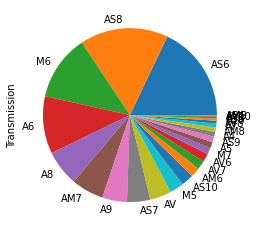

In [9]:
df['Transmission'].value_counts(normalize=True).plot.pie()

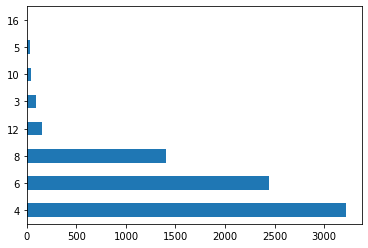

In [10]:
df['Cylinders'].value_counts().plot.barh()

In [11]:
df['Fuel Consumption City (L/100 km)'].describe()

count    7385.000000
mean       12.556534
std         3.500274
min         4.200000
25%        10.100000
50%        12.100000
75%        14.600000
max        30.600000
Name: Fuel Consumption City (L/100 km), dtype: float64

# EDA - Bivariate Analysis

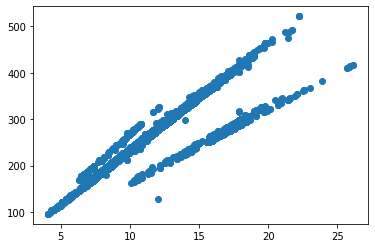

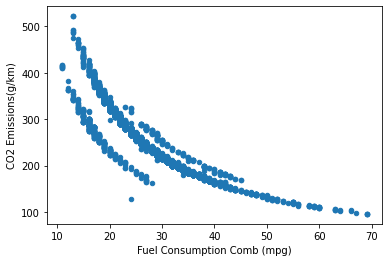

In [12]:
plt.scatter(df['Fuel Consumption Comb (L/100 km)'],df['CO2 Emissions(g/km)'])
plt.show()
df.plot.scatter(x='Fuel Consumption Comb (mpg)',y='CO2 Emissions(g/km)')
plt.show()

Graph1 shows direct proportion whereas Graph2 shows inverse proportionality, hence more fuel consumption in mpg would mean lesser CO2 emission and more fuel consumption in L/100 km would mean more CO2 emission

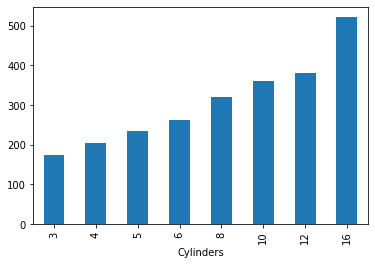

In [13]:
df.groupby('Cylinders')['CO2 Emissions(g/km)'].mean().plot.bar()

More the number of cylinders, more is the CO2 emission

# EDA - Multivariate Analysis

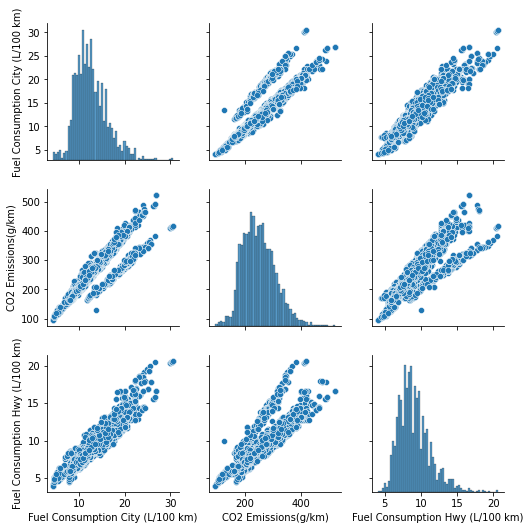

In [16]:
sns.pairplot(data = df,vars = ['Fuel Consumption City (L/100 km)','CO2 Emissions(g/km)','Fuel Consumption Hwy (L/100 km)'])
plt.show()

Fuel Type                         D          E     N          X          Z
Vehicle Class                                                             
COMPACT                    7.817391  12.731250   NaN   8.956920  12.239252
FULL-SIZE                  9.933333  17.812000   NaN  11.647872  14.869079
MID-SIZE                   8.792308  16.917391  15.2   9.392295  13.038683
MINICOMPACT                     NaN        NaN   NaN   8.597727  12.030851
MINIVAN                         NaN  19.281818   NaN  12.873913        NaN
PICKUP TRUCK - SMALL      11.875000        NaN   NaN  13.305926        NaN
PICKUP TRUCK - STANDARD   11.357143  19.988288   NaN  14.786188  15.923333
SPECIAL PURPOSE VEHICLE         NaN  15.418182   NaN  11.378947  11.533333
STATION WAGON - MID-SIZE        NaN        NaN   NaN   9.825000  13.113793
STATION WAGON - SMALL      7.800000        NaN   NaN   9.198895  10.764516
SUBCOMPACT                 7.600000        NaN   NaN  11.171942  12.598498
SUV - SMALL              

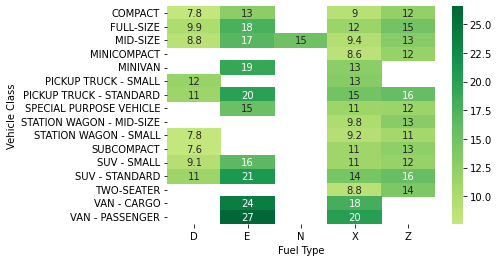

In [17]:
result = pd.pivot_table(data=df,index = 'Vehicle Class',columns = 'Fuel Type',values='Fuel Consumption City (L/100 km)')
print(result)
sns.heatmap(result,annot=True,cmap='RdYlGn',center=0.117)
plt.show()

# Data Preprocessing

In [18]:
df['Model'].value_counts()

F-150 FFV 4X4           32
F-150 FFV               32
MUSTANG                 27
FOCUS FFV               24
SONIC                   20
                        ..
AVENTADOR S ROADSTER     1
HURACAN AWD              1
HURACAN SPYDER AWD       1
LS 500                   1
XC40 T4 AWD              1
Name: Model, Length: 2053, dtype: int64

In [19]:
Model_Type = ['4WD','4X4','AWD','FFV','SWB','LWB','EWB']
df[Model_Type] = pd.DataFrame(np.zeros(shape=(len(df),len(Model_Type))))
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),4WD,4X4,AWD,FFV,SWB,LWB,EWB
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
for i in range(len(df)):
  for j in df['Model'][i].split(" "):
    if j in Model_Type:
      df[j][i] = 1
df['4WD'] = df['4X4'] + df['4WD']
df.drop(['4X4','Model'],axis=1,inplace=True)
df.tail()      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Make,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),4WD,AWD,FFV,SWB,LWB,EWB
7380,VOLVO,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,0.0,1.0,0.0,0.0,0.0,0.0
7381,VOLVO,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,0.0,1.0,0.0,0.0,0.0,0.0
7382,VOLVO,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240,0.0,1.0,0.0,0.0,0.0,0.0
7383,VOLVO,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232,0.0,1.0,0.0,0.0,0.0,0.0
7384,VOLVO,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248,0.0,1.0,0.0,0.0,0.0,0.0


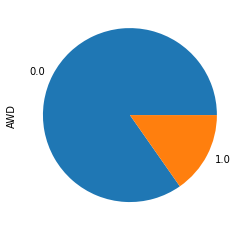

In [21]:
df['AWD'].value_counts(normalize=True).plot.pie()

# Encoding Categories

In [22]:
pd.get_dummies(df['Fuel Type'])

,D,E,N,X,Z
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
7380,0,0,0,0,1
7381,0,0,0,0,1
7382,0,0,0,0,1
7383,0,0,0,0,1


In [23]:
dummies = pd.get_dummies(df[['Fuel Type','Make','Transmission','Vehicle Class']])
print(dummies)
encoded_df = pd.concat([df,dummies],axis=1)
encoded_df.drop(['Fuel Type','Make','Transmission','Vehicle Class'],axis=1,inplace=True)
encoded_df.head()

      Fuel Type_D  Fuel Type_E  Fuel Type_N  Fuel Type_X  Fuel Type_Z  \
0               0            0            0            0            1   
1               0            0            0            0            1   
2               0            0            0            0            1   
3               0            0            0            0            1   
4               0            0            0            0            1   
...           ...          ...          ...          ...          ...   
7380            0            0            0            0            1   
7381            0            0            0            0            1   
7382            0            0            0            0            1   
7383            0            0            0            0            1   
7384            0            0            0            0            1   

      Make_ACURA  Make_ALFA ROMEO  Make_ASTON MARTIN  Make_AUDI  Make_BENTLEY  \
0              1                0         

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),4WD,AWD,FFV,...,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER
0,2.0,4,9.9,6.7,8.5,33,196,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,11.2,7.7,9.6,29,221,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,6.0,5.8,5.9,48,136,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,12.7,9.1,11.1,25,255,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,12.1,8.7,10.6,27,244,0.0,1.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
y = encoded_df['CO2 Emissions(g/km)']
X = encoded_df.drop('CO2 Emissions(g/km)',axis=1)
print(y.head())
X.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2 Emissions(g/km), dtype: int64


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),4WD,AWD,FFV,SWB,...,Vehicle Class_PICKUP TRUCK - STANDARD,Vehicle Class_SPECIAL PURPOSE VEHICLE,Vehicle Class_STATION WAGON - MID-SIZE,Vehicle Class_STATION WAGON - SMALL,Vehicle Class_SUBCOMPACT,Vehicle Class_SUV - SMALL,Vehicle Class_SUV - STANDARD,Vehicle Class_TWO-SEATER,Vehicle Class_VAN - CARGO,Vehicle Class_VAN - PASSENGER
0,2.0,4,9.9,6.7,8.5,33,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2.4,4,11.2,7.7,9.6,29,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1.5,4,6.0,5.8,5.9,48,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,3.5,6,12.7,9.1,11.1,25,1.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,3.5,6,12.1,8.7,10.6,27,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=4)

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report
base_model = RandomForestRegressor(n_estimators=5,random_state=0)
base_model.fit(X_train,y_train)
print('Baseline training accuracy:',base_model.score(X_train,y_train))
print('Baseline testing accuracy:',base_model.score(X_test,y_test))



Baseline training accuracy: 0.9992117630911788
Baseline testing accuracy: 0.9969477813648465


# Testing for overfitting using GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[50,80,100],'max_features':[2,3,4],'min_samples_leaf':[3,4,5],'min_samples_split':[8,10,12],'n_estimators':[5,10,50,100]}

In [29]:
rf_grids = RandomForestRegressor(random_state = 0)
grid_search = GridSearchCV(estimator=rf_grids,param_grid=param_grid,cv=5,verbose=2)
grid_fit = grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=5; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=10; total time=   0.0s
[CV] END max_

In [30]:
best_parameters = grid_fit.best_params_
best_parameters

{'max_depth': 50,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [32]:
print('Training Accuracy:',grid_fit.score(X_train,y_train),'\n')
y_pred = grid_fit.predict(X_test)

Training Accuracy: 0.9689590513398341 



In [33]:
print('Testing Accuracy:',grid_fit.score(X_test,y_test),'\n')

Testing Accuracy: 0.9684170558834474 



As we can see, the base model had overfit by a good extent, and after applying GridSearchCV to tune the hyperparameters, we get the final training and testing accuracies as 96.9% and 96.9% respectively